# Proper Loan Data Exploration
## by Kamie Carney

## Preliminary Wrangling

This document explores a dataset containing 113,937 loans with variables on each
loan, including loan amount, borrower rate,
current loan status, borrower income, and others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [3]:
df.shape

(113937, 81)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

### What is the structure of your dataset?

> The dataset has 113,937 rows of data with 81 columns of variables.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are the borrower's interest rate (BorrowerRate) and the current loan status (LoanStatus).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will support the investigation of my feature(s) of interest include employment status (EmploymentStatus), the credit score of the applicant (CreditScoreRangeUpper), income range, and possibly the debt to income ratio.  Possible questions include: 
* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?
* Are there differences between loans depending on how large the original loan amount was?

## Assessing Data

##### Columns keeping:
Term
LoanStatus
BorrowerRate
ProsperScore
ListingCategory
EmploymentStatus
IsBorrowerHomeowner
CreditScoreRangeLower
CreditScoreRangeUpper
OpenRevolvingAccounts
CurrentDelinquencies
AmountDelinquent
DebtToIncomeRatio
IncomeRange
StatedMonthlyIncome
LoanCurrentDaysDelinquent
LoanNumber
LoanOriginalAmount
LoanOriginationDate

##### Columns not needed:
ListingKey
ListingNumber
ListingCreationDate
CreditGrade
ClosedDate
BorrowerAPR
LenderYield
EstimatedEffectiveYield
EstimatedLoss
EstimatedReturn
ProsperRating (numeric)
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatusDuration
CurrentlyInGroup
GroupKey
DateCreditPulled
FirstRecordedCreditLine
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
OpenRevolvingMonthlyPayment
InquiriesLast6Months
TotalInquiries
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent
TradesOpenedLast6Months
IncomeVerifiable
LoanKey
TotalProsperLoans
TotalProsperPaymentsBilled
OnTimeProsperPayments
ProsperPaymentsLessThanOneMonthLate
ProsperPaymentsOneMonthPlusLate
ProsperPrincipalBorrowed
ProsperPrincipalOutstanding
ScorexChangeAtTimeOfListing
LoanFirstDefaultedCycleNumber
LoanMonthsSinceOrigination
LoanOriginationQuarter
MemberKey
MonthlyLoanPayment
LP_CustomerPayments
LP_CustomerPrincipalPayments
LP_InterestandFees
LP_ServiceFees
LP_CollectionFees
LP_GrossPrincipalLoss
LP_NetPrincipalLoss
LP_NonPrincipalRecoverypayments
PercentFunded
Recommendations
InvestmentFromFriendsCount
InvestmentFromFriendsAmount
Investors

### Missing Data
The following columns of interest have missing data:
* ProsperScore                         84853 non-null   float64
* EmploymentStatus                     111682 non-null  object 
* CreditScoreRangeLower                113346 non-null  float64
* CreditScoreRangeUpper                113346 non-null  float64
* CurrentDelinquencies                 113240 non-null  float64
* AmountDelinquent                     106315 non-null  float64
* DebtToIncomeRatio                    105383 non-null  float64 

#### Reasons for missing data
* ProsperScore: only assigned to loans after July 2009, can't fix.
* The rest of the variables had no explanation for missing values, cannot fix at this time.


In [5]:
df.LoanNumber.duplicated().sum()

871

In [6]:
df.duplicated().sum()

0

##### None of the rows were completely duplicated even though it was determined that there were duplicate entries for LoanNumber.  

## Cleaning Data

In [3]:
df_clean = df.copy()

In [4]:
df_clean.shape

(113937, 81)

##### Remove columns not needed in order to simplify the data.

In [5]:
df_clean.drop(columns=['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'BorrowerAPR', 'LenderYield',
                 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 
                 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'EmploymentStatusDuration', 'CurrentlyInGroup', 
                 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 
                 'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 
                 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance',
                 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
                'IncomeVerifiable', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
                 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
                 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 
                 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanOriginationQuarter', 'MemberKey', 
                 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 
                 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 
                 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 
                 'InvestmentFromFriendsAmount', 'Investors'], inplace=True)

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperScore               84853 non-null   float64
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   IsBorrowerHomeowner        113937 non-null  bool   
 7   CreditScoreRangeLower      113346 non-null  float64
 8   CreditScoreRangeUpper      113346 non-null  float64
 9   OpenRevolvingAccounts      113937 non-null  int64  
 10  CurrentDelinquencies       113240 non-null  float64
 11  AmountDelinquent           106315 non-null  float64
 12  DebtToIncomeRatio          105383 non-null  float64
 13  IncomeRange                11

In [7]:
#Convert LoanOriginationDate to a datetime dtype
df_clean.LoanOriginationDate = pd.to_datetime(df_clean.LoanOriginationDate)

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Term                       113937 non-null  int64         
 1   LoanStatus                 113937 non-null  object        
 2   BorrowerRate               113937 non-null  float64       
 3   ProsperScore               84853 non-null   float64       
 4   ListingCategory (numeric)  113937 non-null  int64         
 5   EmploymentStatus           111682 non-null  object        
 6   IsBorrowerHomeowner        113937 non-null  bool          
 7   CreditScoreRangeLower      113346 non-null  float64       
 8   CreditScoreRangeUpper      113346 non-null  float64       
 9   OpenRevolvingAccounts      113937 non-null  int64         
 10  CurrentDelinquencies       113240 non-null  float64       
 11  AmountDelinquent           106315 non-null  float64 

In [9]:
df_clean.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [14]:
df_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [15]:
df_clean.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [16]:
df_clean['ListingCategory (numeric)'].value_counts()
#The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 
#1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 
#8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 
#14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [10]:
#Convert ListingCategory to categorical datatype.
df_clean['ListingCategory (numeric)'] = df_clean['ListingCategory (numeric)'].astype("category")

In [11]:
#Create dictionary to use in mapping a new column.
ListingCategoryVariables = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
                            5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 
                            11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 
                            15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

In [12]:
#Create a new column that maps the value to the key in the dictionary above.
df_clean['ListingCategory'] = df_clean['ListingCategory (numeric)'].map(ListingCategoryVariables)

In [13]:
df_clean.ListingCategory.value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [14]:
#IncomeRange, EmploymentStatus and LoanStatus better as ordered categorical for my purposes
ordinal_var_dict = {'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                    '$75,000-99,999', '$100,000+'],
                    'LoanStatus': ['Current', 'Completed', 'FinalPaymentInProgress', 'Chargedoff', 'Defaulted', 'Cancelled', 
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'EmploymentStatus': ['Employed', 'Full-time', 'Part-time', 'Self-employed', 'Retired', 'Not employed', 'Other',
                                        'Not available']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Term                       113937 non-null  int64         
 1   LoanStatus                 113937 non-null  category      
 2   BorrowerRate               113937 non-null  float64       
 3   ProsperScore               84853 non-null   float64       
 4   ListingCategory (numeric)  113937 non-null  category      
 5   EmploymentStatus           111682 non-null  category      
 6   IsBorrowerHomeowner        113937 non-null  bool          
 7   CreditScoreRangeLower      113346 non-null  float64       
 8   CreditScoreRangeUpper      113346 non-null  float64       
 9   OpenRevolvingAccounts      113937 non-null  int64         
 10  CurrentDelinquencies       113240 non-null  float64       
 11  AmountDelinquent           106315 non-null  float64 

## Univariate Exploration

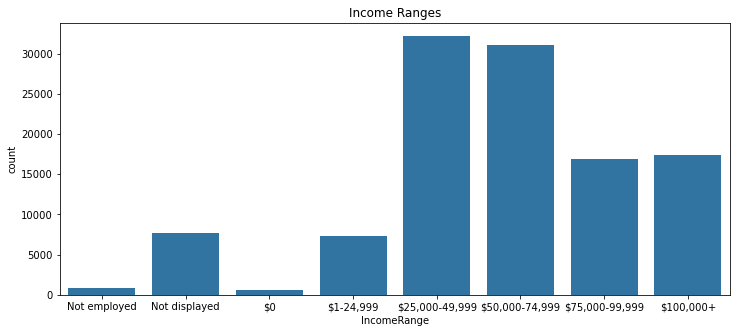

In [46]:
plt.figure(figsize=[12, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='IncomeRange', color=base_color);
plt.title('Income Ranges');

#### The plot of the ordered income ranges shows the highest concentration of incomes between 25,000 and 74,999.

Mean borrower interest rate:  0.19


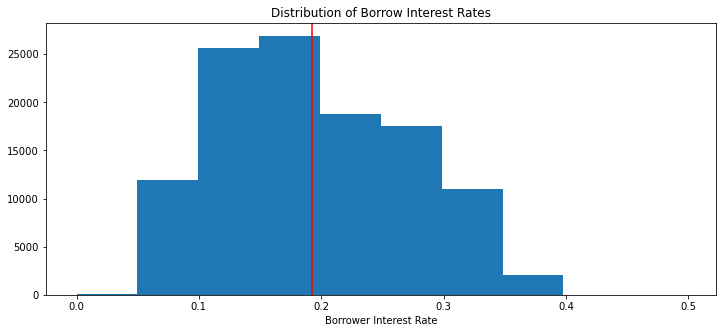

In [15]:
rate_mean = df_clean.BorrowerRate.mean()
print('Mean borrower interest rate:  {:0.2f}'.format(rate_mean))
plt.figure(figsize=[12, 5])
plt.hist(data = df_clean, x = 'BorrowerRate')
plt.xlabel('Borrower Interest Rate');
plt.axvline(x=rate_mean, color='r');
plt.title('Distribution of Borrow Interest Rates');

##### The distribution of borrower rates is right skewed, showing that more borrowers fell within the higher interest rate loans.

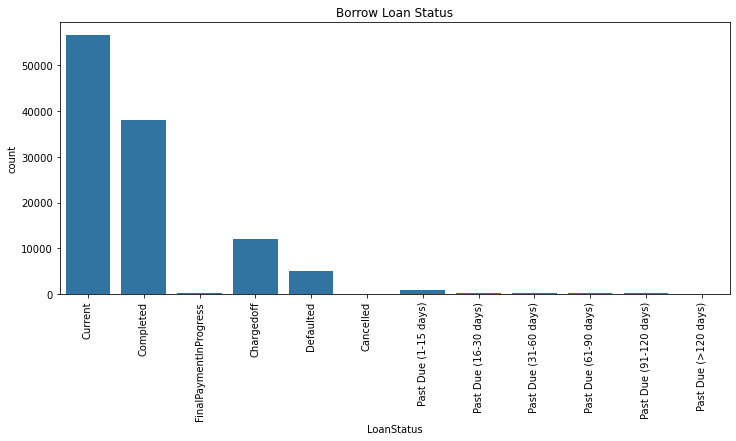

In [49]:
plt.figure(figsize=[12, 5])
sb.countplot(data=df_clean, x='LoanStatus', color=base_color);
plt.xticks(rotation=90);
plt.title('Borrow Loan Status');

##### This bar plot shows that the majority of loans are either current or completed.

Mean loan amount:  $8337.01


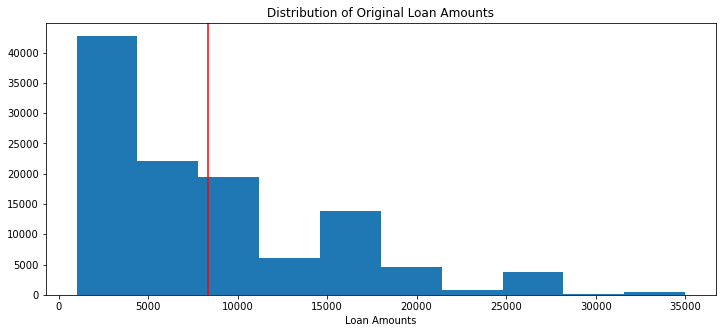

In [58]:
amount_mean = df_clean.LoanOriginalAmount.mean()
print('Mean loan amount:  ${:0.2f}'.format(amount_mean))
plt.figure(figsize=[12, 5])
plt.hist(data = df_clean, x = 'LoanOriginalAmount')
plt.xlabel('Loan Amounts');
plt.axvline(x=amount_mean, color='r');
plt.title('Distribution of Original Loan Amounts');

##### Loan amounts are right skewed, showing that the majority of loans fell above the mean loan amount.

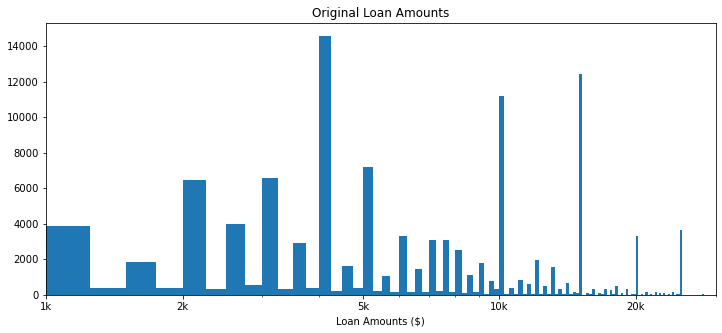

In [39]:
#try doing a log transformation on loan amounts to see if it helps the distribution
bins = np.arange(df_clean['LoanOriginalAmount'].min()-250, df_clean['LoanOriginalAmount'].max()+250, 250)

plt.figure(figsize=[12, 5])
plt.hist(data = df_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k','10k', '20k', '50k'])
plt.xlabel('Loan Amounts ($)');
plt.xlim(1000, 30000) #zoomed in to be able to see spikes better
plt.title('Original Loan Amounts');

##### Spikes around 4,000, 10,000, and 15,000.  Could be interesting to see what types of loans are at those amounts.

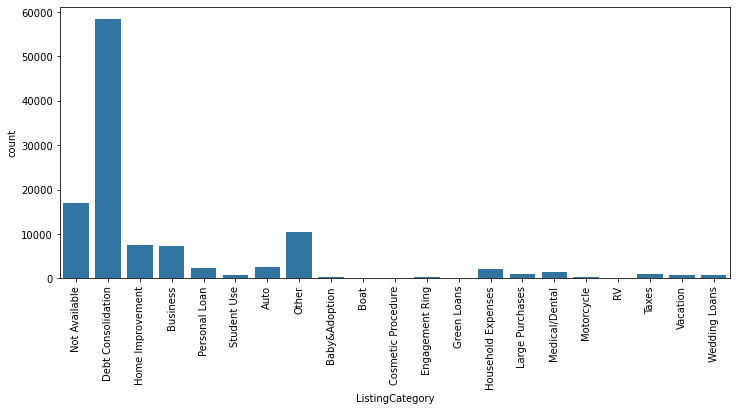

In [27]:
plt.figure(figsize=[12, 5])
sb.countplot(data=df_clean, x='ListingCategory', color=base_color);
plt.xticks(rotation=90);

##### A lot of the loans were debt consolidation.

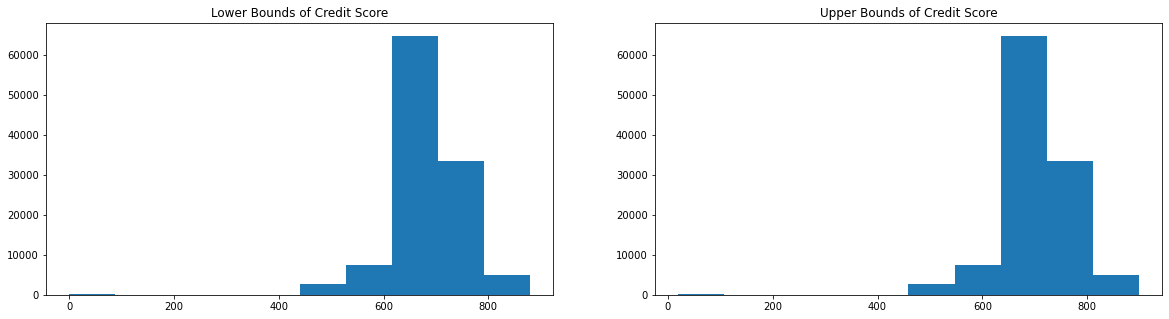

In [45]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.hist(data = df_clean, x = 'CreditScoreRangeLower', color = base_color);
plt.title('Lower Bounds of Credit Score');
plt.subplot(1,2,2)
plt.hist(data = df_clean, x = 'CreditScoreRangeUpper', color = base_color);
plt.title('Upper Bounds of Credit Score');

###### Both distributions are the exact same.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Since the original loan amount histogram was skewed, I tried a log transformation to see if it would help provide additional details.  With the log transformation, the data appeared bimodal.  There were spikes at loan amounts of 4,000, 10,000, and 15,000.  It could be interesting to see what types of loans are associated with those amounts.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I didn't notice any particularly unusual distributions, however, I do believe it's worth examing in further detail what features affect borrow interest rates.  Also, the credit range upper and lower seems to contain the same data so I can just use one of those columns when trying to determine if credit score affected borrow interest rates.  

> Columns that were not needed for analysis were removed in order to make the dataset more manageable.  I also changed data types to datetime or categorical as required and made the variables IncomeRange, EmploymentStatus, and LoanStatus ordered categorical data types.

## Bivariate Exploration

In [18]:
#Examine relationships between variables.
numeric_vars = ['BorrowerRate', 'CreditScoreRangeUpper', 'OpenRevolvingAccounts', 'AmountDelinquent', 'DebtToIncomeRatio', 
                'StatedMonthlyIncome', 'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'ListingCategory', 'IncomeRange']

##### Run correlations on the numeric variables to determine variables that most impact each other.

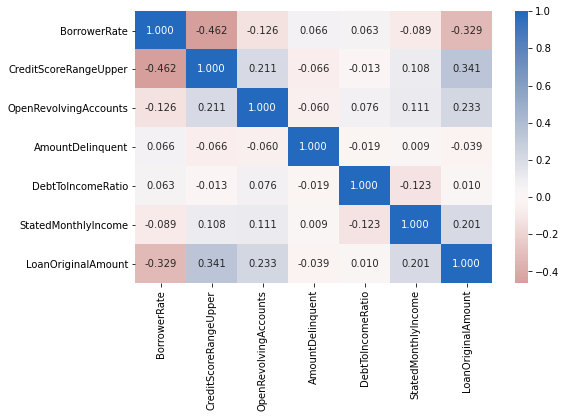

In [61]:
#Correlations between numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

##### Strongest correlation seems to be between Credit score and Borrow Rate so going to examine that in further detail.

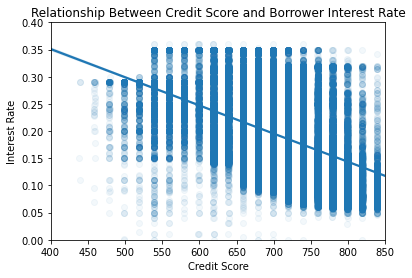

In [76]:
sb.regplot(data=df_clean, x='CreditScoreRangeUpper', y="BorrowerRate", truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.xlim(400, 850);
plt.ylim(0, .4);
plt.xlabel('Credit Score');
plt.ylabel('Interest Rate');
plt.title('Relationship Between Credit Score and Borrower Interest Rate');

##### The scatter plot does seem to show a weak negative relationship between the credit score and the borrower interest rate.  As the credit score increases, the interest rate decreases.

##### Run a grid of boxplots to get an overall view of the influence of categorical variables on borrower interest rates and loan amounts.

In [19]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color= sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = base_color)

<Figure size 720x720 with 0 Axes>

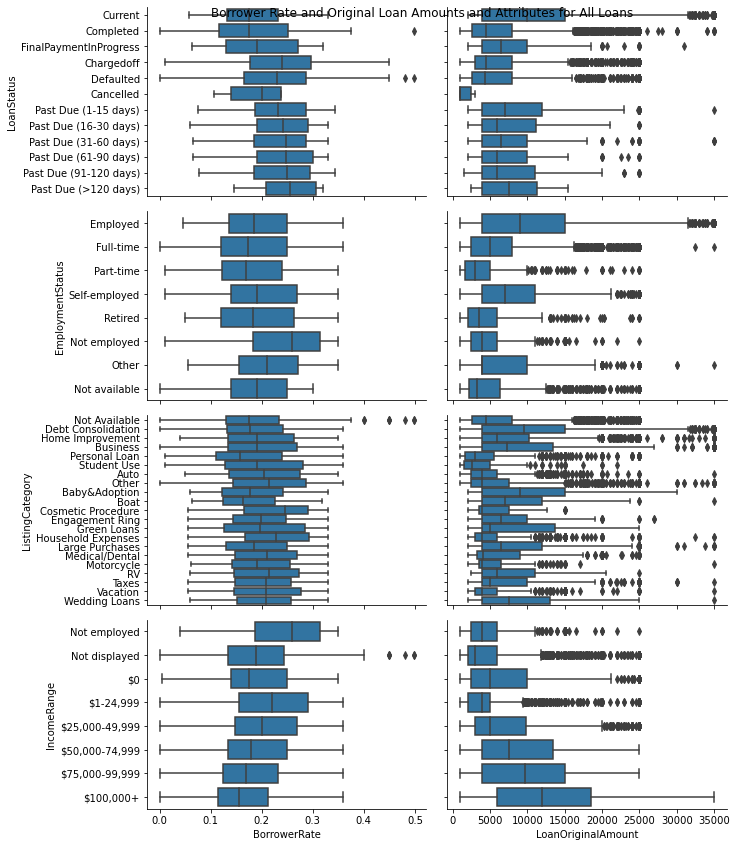

In [153]:
#Check influence of categorical variables on BorrowerRate
plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = df_clean, y_vars = categoric_vars , x_vars = ['BorrowerRate', 'LoanOriginalAmount'], height = 3, aspect = 1.5);
g.map(boxgrid);
g.fig.suptitle('Borrower Rate and Original Loan Amounts and Attributes for All Loans', va='top');

##### The income range category shows a relationship with a higher borrower interest rate in the "Not employed" or "1-24,999" categories.  Not too surprising.  Similarly unemployed individuals also show a higher loan interest rate.  The mean interest rate for loan types was the highest for cosmetic procedures, followed by household expenses.

##### Debt consolidation and baby adoption seem to account for the highest loan amounts and the more money people made, the higher the loan appears to be.

In [181]:
df_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [16]:
#Interested in what causes defaults or past due status.
#First will need to create a dataframe holding only those rows of data.
df_sub_variables = ['Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)',
                                             'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (16-30 days)', 
                                              'Past Due (>120 days)']
df_sub = df_clean.loc[df_clean['LoanStatus'].isin(df_sub_variables)]
df_sub.LoanStatus.value_counts()

Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
Past Due (>120 days)         16
Cancelled                     0
FinalPaymentInProgress        0
Completed                     0
Current                       0
Name: LoanStatus, dtype: int64

In [188]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19077 entries, 12 to 113926
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Term                       19077 non-null  int64         
 1   LoanStatus                 19077 non-null  category      
 2   BorrowerRate               19077 non-null  float64       
 3   ProsperScore               8408 non-null   float64       
 4   ListingCategory (numeric)  19077 non-null  category      
 5   EmploymentStatus           18264 non-null  category      
 6   IsBorrowerHomeowner        19077 non-null  bool          
 7   CreditScoreRangeLower      18903 non-null  float64       
 8   CreditScoreRangeUpper      18903 non-null  float64       
 9   OpenRevolvingAccounts      19077 non-null  int64         
 10  CurrentDelinquencies       18844 non-null  float64       
 11  AmountDelinquent           15992 non-null  float64       
 12  De

##### Examine the relationships specifically for Defaulted and Past Due Loans with regards to Original Loan Amount, Borrower Interest

<Figure size 720x720 with 0 Axes>

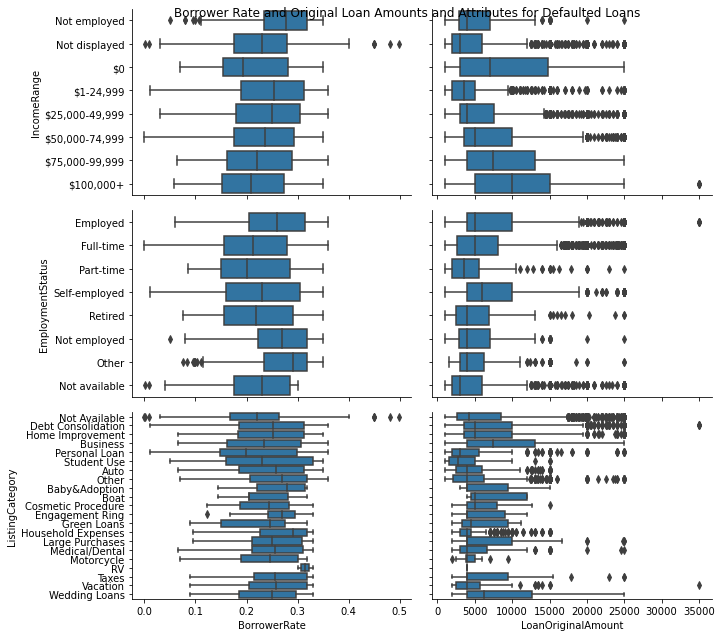

In [26]:
#Examine the relationships specifically for Defaulted and Past Due Loans with regards to Original Loan Amount, Borrower Interest Rate, and Categorical Variables.
plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = df_sub, y_vars = ['IncomeRange', 'EmploymentStatus', 'ListingCategory'] , 
                x_vars = ['BorrowerRate', 'LoanOriginalAmount'], height = 3, aspect = 1.5);
g.map(boxgrid);
g.fig.suptitle('Borrower Rate and Original Loan Amounts and Attributes for Defaulted Loans');

##### Results similar to when plots were run against entire dataset.  Could be more interesting to see what the LoanOriginalAmount and BorrowerRate were for those defaulted loans.

##### Narrow the focus on just how borrower interest rates and loan amounts affect the outcome of the loan.

<Figure size 1440x1440 with 0 Axes>

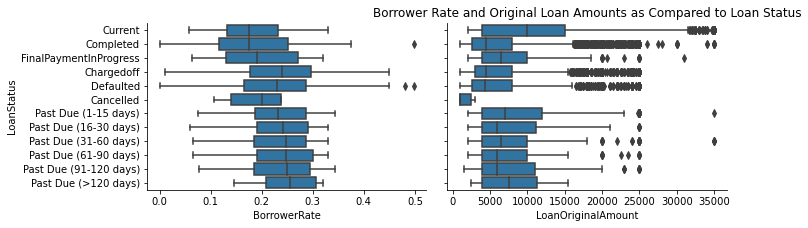

In [148]:
#Take a closer look at just the data related to LoanStatus. Whole dataset
plt.figure(figsize = [20, 20]);
g = sb.PairGrid(data = df_clean, y_vars = 'LoanStatus' , x_vars = ['BorrowerRate', 'LoanOriginalAmount'], height = 3, aspect = 1.5);
g.map(boxgrid);
plt.title('Borrower Rate and Original Loan Amounts as Compared to Loan Status');

##### Based off these plots, there doesn't seem to be much difference between the different categories of LoanStatus and the borrower interest rate but charged off and defaulted loans have the highest spread.  When loan status is compared to the original loan amounts, it actually appears as though the larger the loan, the greater chance of staying current with loan payments.

In [27]:
BorrowerRate_mean_whole = df_clean.BorrowerRate.mean()
LoanAmount_mean_whole = df_clean.LoanOriginalAmount.mean()
BorrowerRate_mean_sub = df_sub.BorrowerRate.mean()
LoanAmount_mean_sub = df_sub.LoanOriginalAmount.mean()

In [29]:
#Compare means for the two dataframes
print('Mean loan amount for whole dataframe:  ${:0.2f}'.format(LoanAmount_mean_whole))
print('Mean loan amount for dataframe with only defaulted or overdue loans:  ${:0.2f}'.format(LoanAmount_mean_sub))
print('Mean borrower interest rate for whole dataframe:  {:0.2f}'.format(BorrowerRate_mean_whole))
print('Mean borrower interest rate for dataframe with only defaulted or overdue loans:  {:0.2f}'.format(BorrowerRate_mean_sub))

Mean loan amount for whole dataframe:  $8337.01
Mean loan amount for dataframe with only defaulted or overdue loans:  $6623.51
Mean borrower interest rate for whole dataframe:  0.19
Mean borrower interest rate for dataframe with only defaulted or overdue loans:  0.23


##### Interesting to see that the average loan amount for the defaulted or overdue dataframe was less than the dataframe as a whole but the interest rate for those loans was higher by .04.

##### Take a look at how the categorical variables impact each other.

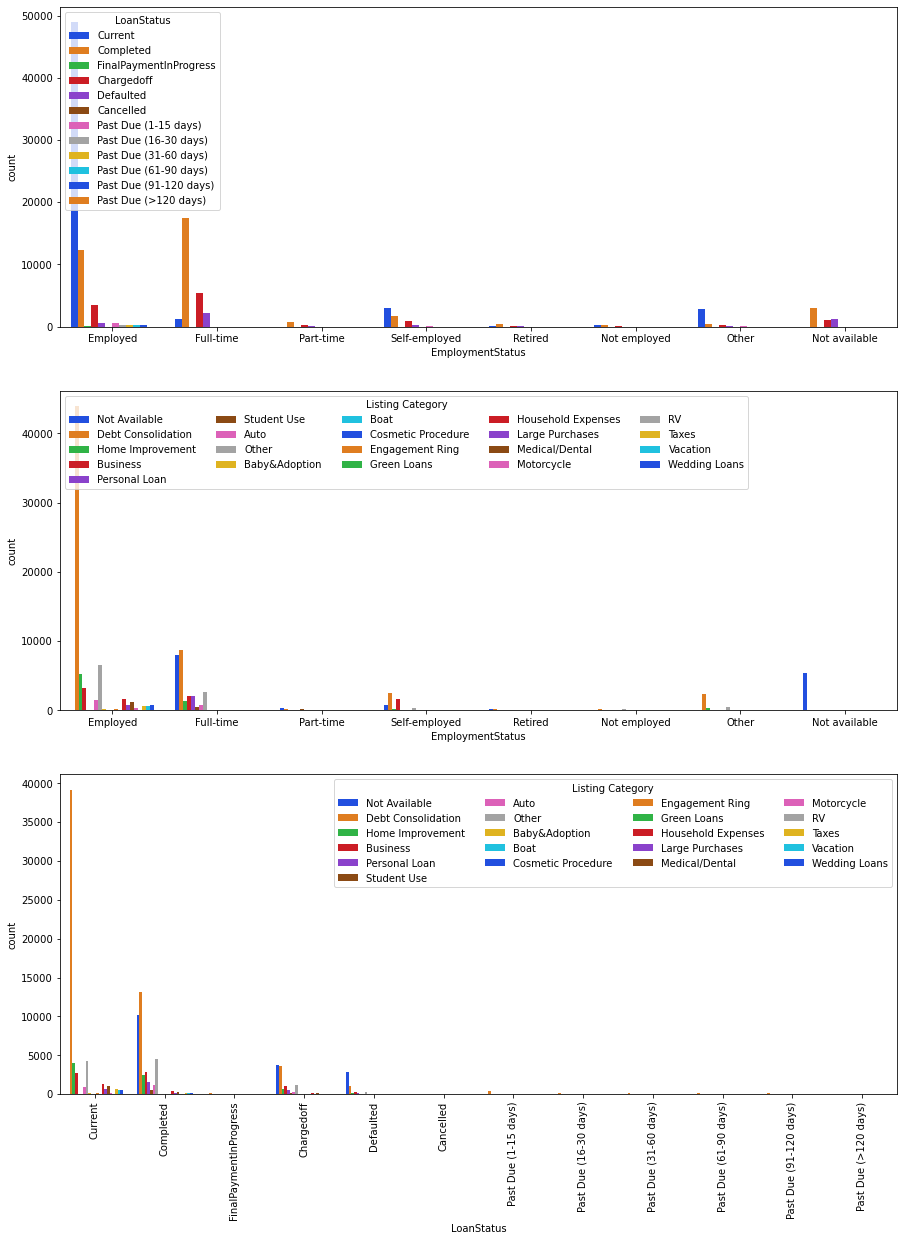

In [97]:
#Plot the categorical variables against each other
plt.figure(figsize = [15, 20])

# subplot 1: EmploymentStatus vs. LoanStatus
plt.subplot(3, 1, 1)
sb.countplot(data = df_clean, x = 'EmploymentStatus', hue ='LoanStatus' , palette = 'bright')
ax.legend(loc=2, title='Loan Status')

# subplot 2: EmploymentStatus vs ListingCategory
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'ListingCategory', palette = 'bright')
ax.legend(loc=2, ncol = 5, title="Listing Category"); # re-arrange legend to reduce overlapping

# subplot 3: LoanStatus vs ListingCategory
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_clean, x = 'LoanStatus', hue = 'ListingCategory', palette = 'bright')
ax.legend(loc = 1, ncol = 4, title="Listing Category");
plt.xticks(rotation=90);


##### The majority of current or completed loans were debt consolidation loans which is also the most frequent loan that is distributed, regardless of employment status.  It was surprising to see that full-time employed individuals had the highest rate of defaulting on a loan.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When I ran a heat map with the correlations of the numeric variables, I was surprised to see that none had a strong relationship.  The strongest correlation was a negative relationship between borrower interest rates and credit score.  While I did expect there to be a relationship between the two variables, it was unexpectedly small.  

> However, when I ran the borrower interest rates against the categorical variables, the income range categories of "Not employed" or "1-24,999" shows a relationship with a higher borrower interest rate which was what was expected. Similarly unemployed individuals also show a higher loan interest rate.  The mean interest rate for loan types was the highest for cosmetic procedures, followed by household expenses.

> Interesting to see that the average loan amount for the defaulted or overdue dataframe was less than the dataframe as a whole but the interest rate for those loans was higher by .04.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Debt consolidation and baby adoption seem to account for the highest loan amounts and the higher the income, the higher the loan appears to be.  The majority of current or completed loans were home improvement loans which is also the most frequent loan that is distributed, regardless of employment status.  It was surprising to see that full-time employed individuals had the highest rate of defaulting on a loan.

## Multivariate Exploration

##### Examine in further detail the impact of credit score and loan amount on borrower interest rates.

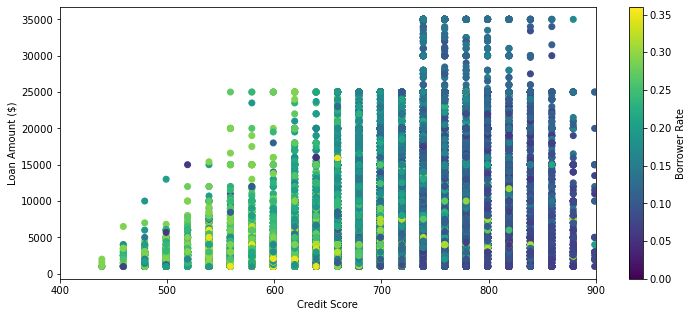

In [129]:
#Scatter plot using original LoanOriginalAmount
plt.figure(figsize=[12,5])
plt.scatter(data=df_clean, x='CreditScoreRangeUpper', y='LoanOriginalAmount', c='BorrowerRate');
plt.colorbar(label='Borrower Rate');
plt.xlim(400, 900);
plt.ylabel('Loan Amount ($)');
plt.xlabel('Credit Score');

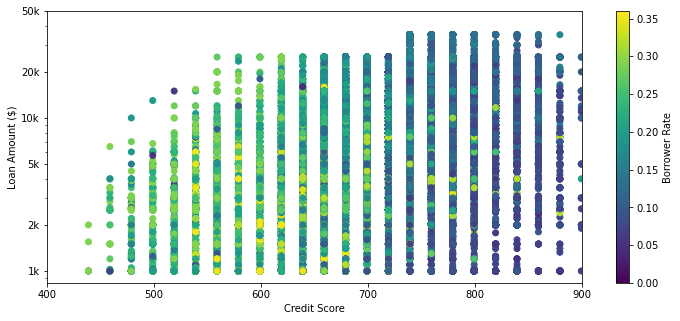

In [128]:
#Now try with LoanOriginalAmount log transformed.
plt.figure(figsize=[12,5])
plt.scatter(data=df_clean, x='CreditScoreRangeUpper', y='LoanOriginalAmount', c='BorrowerRate');
plt.colorbar(label='Borrower Rate');
plt.yscale('log')
plt.yticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k','10k', '20k', '50k'])
plt.xlim(400, 900);
plt.ylabel('Loan Amount ($)');
plt.xlabel('Credit Score');

##### As the borrower's credit score increases, the interest rate decreases.  There are a couple of instances where you can also see some affect of loan amount on the interest rate as well but it's not as dramatic.

##### Run a grid of scatter plots for an overview of the relationships between borrower interest rates, credit scores, and income.

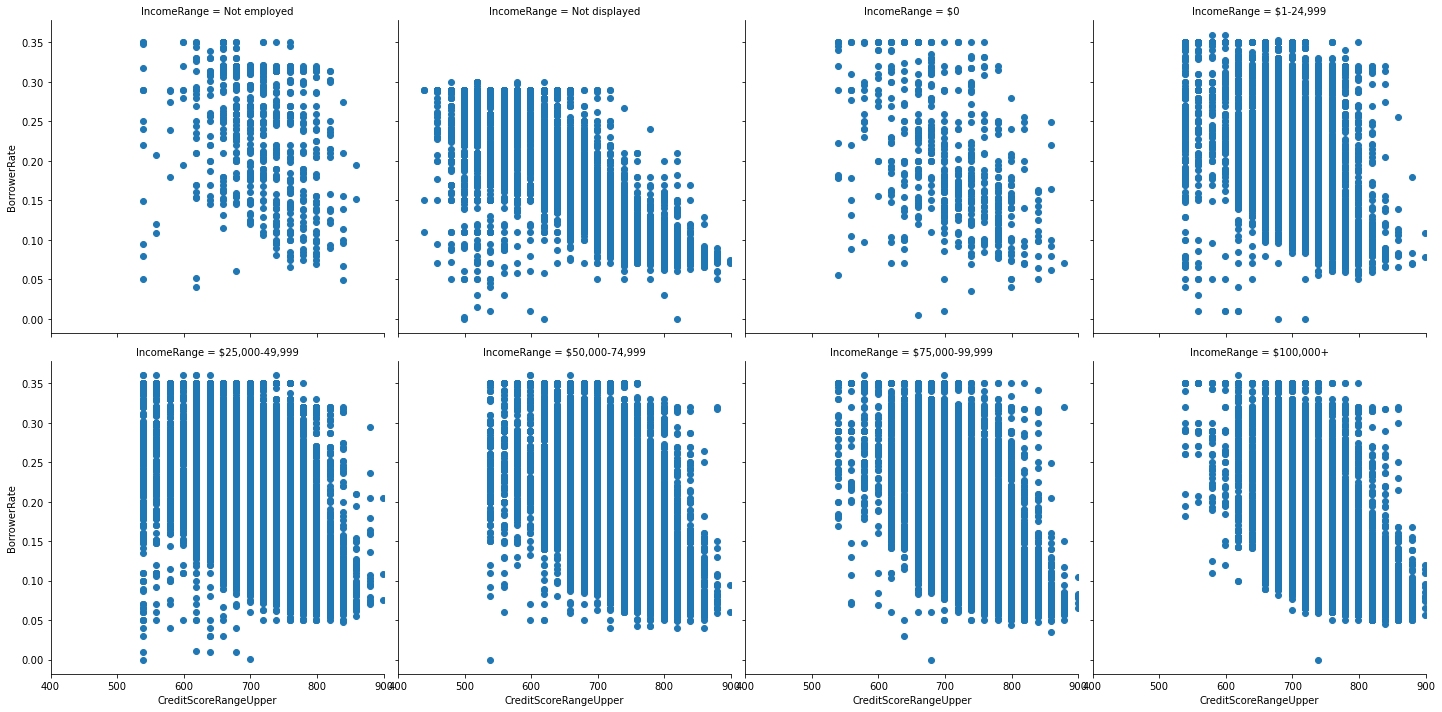

In [87]:
#Create a plot of the relationship between BorrowerRate, CreditScoreRangeUpper, and IncomeRange
g = sb.FacetGrid(data = df_clean, col='IncomeRange', height=5, col_wrap=4)
g.map(plt.scatter, 'CreditScoreRangeUpper', 'BorrowerRate');
plt.xlim(400, 900);

##### Run a grid of scatter plots for an overview of the relationships between borrower interest rates, credit scores, and listing category.

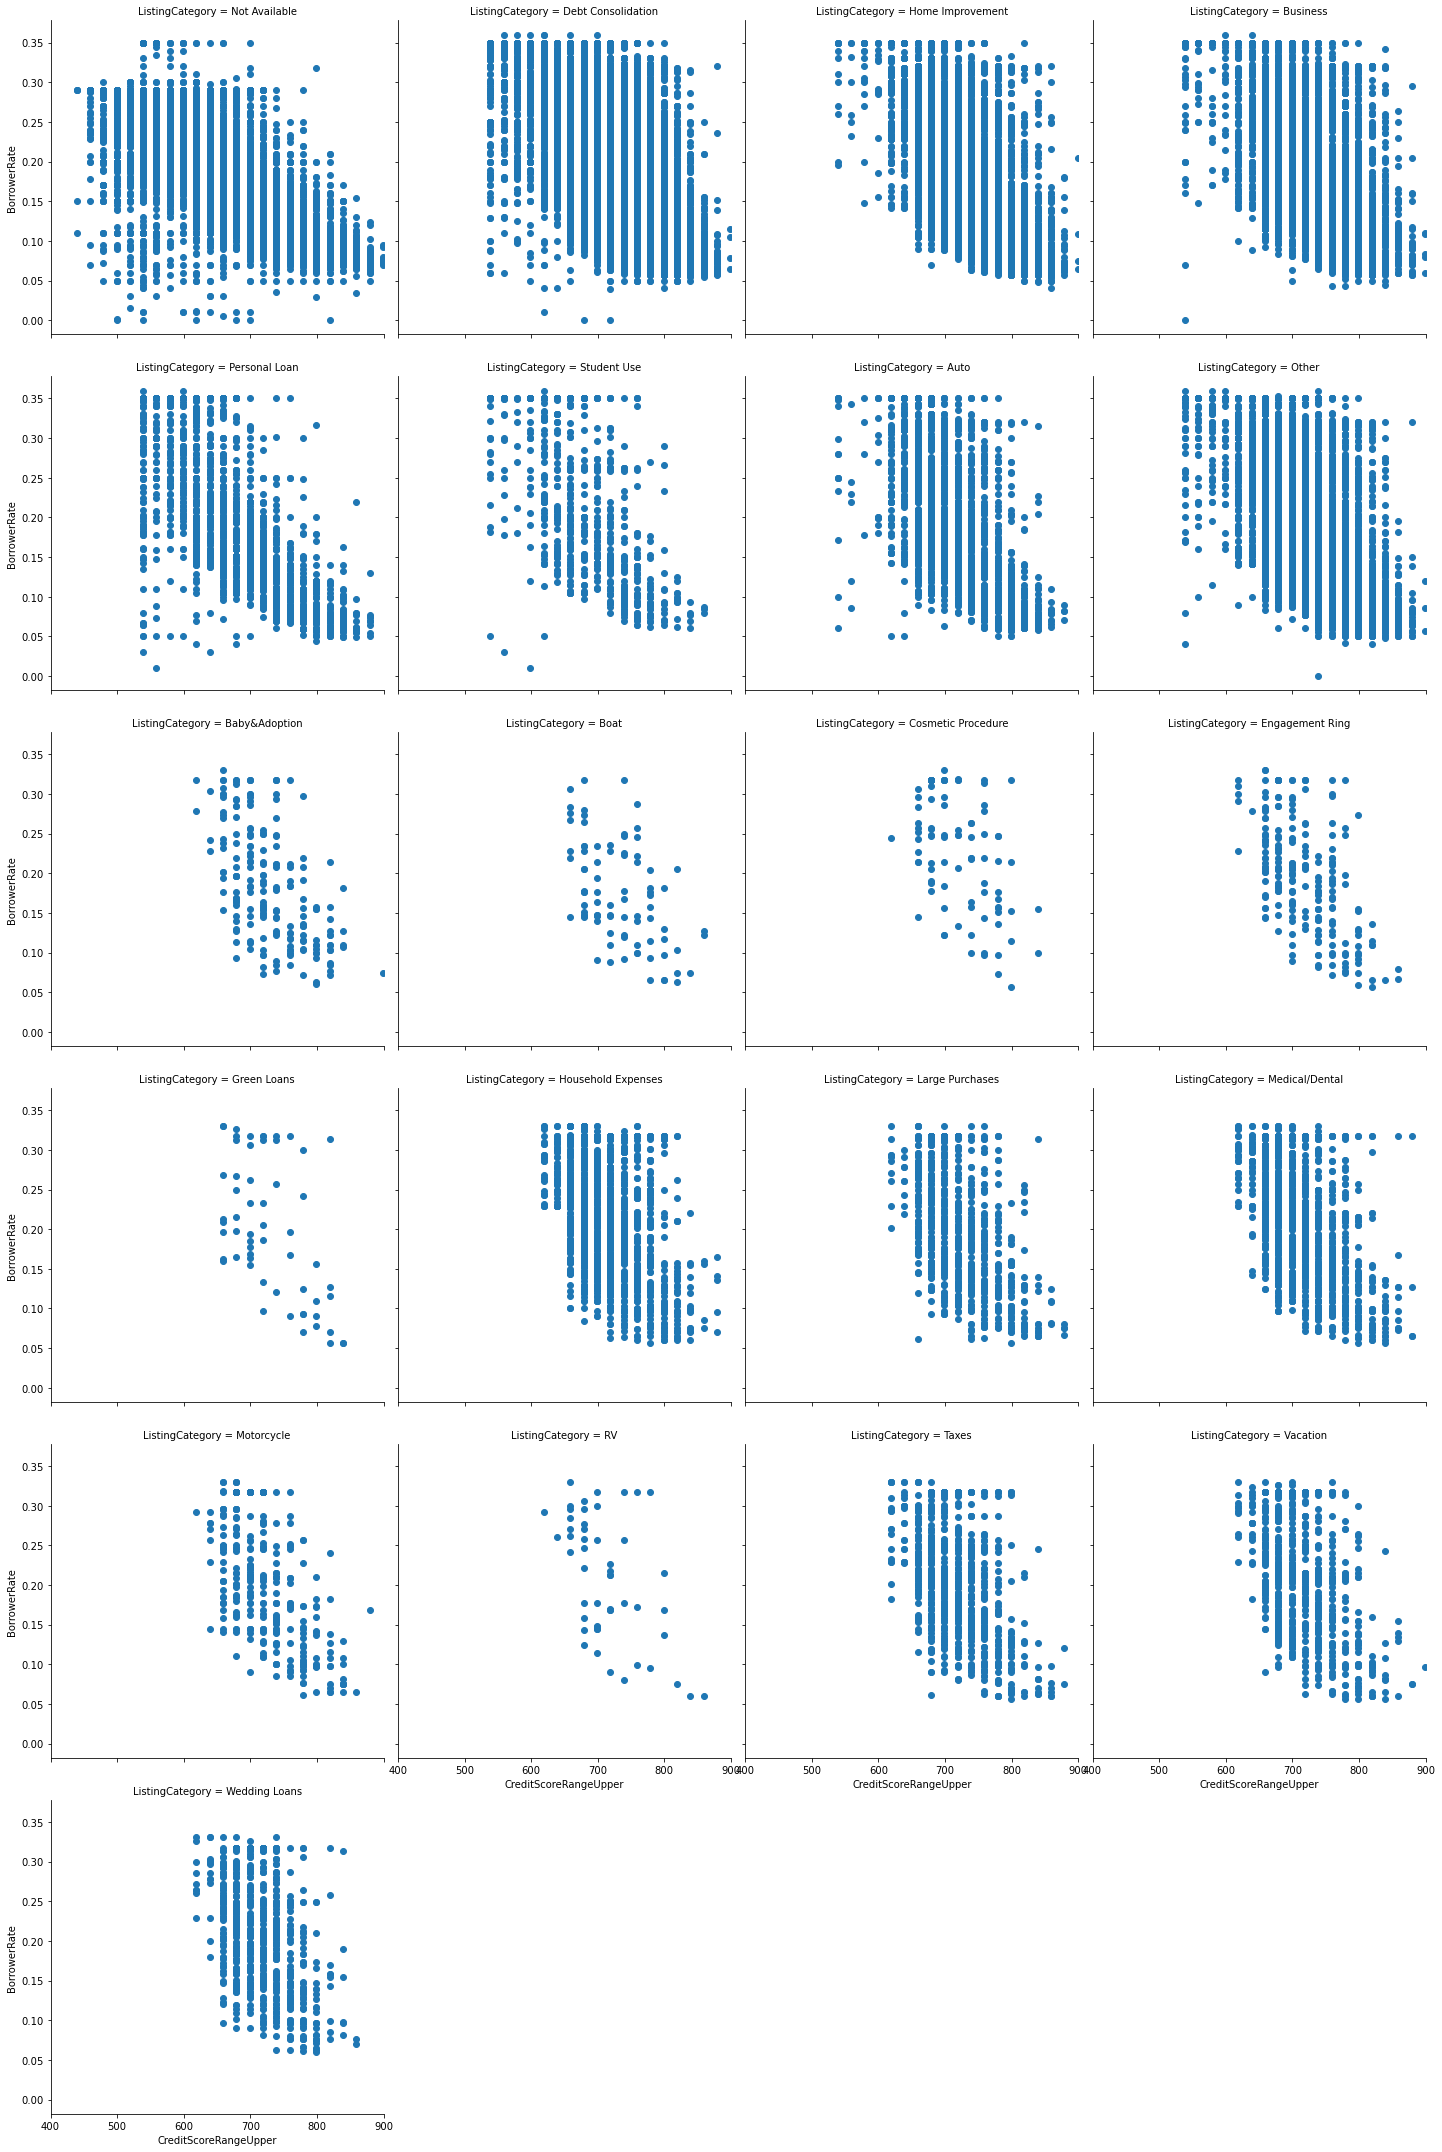

In [68]:
#Create a plot of the relationship between BorrowerRate, CreditScoreRangeUpper, and ListingCategory
g = sb.FacetGrid(data = df_clean, col='ListingCategory', height=5, col_wrap=4)
g.map(plt.scatter,'CreditScoreRangeUpper', 'BorrowerRate');
plt.xlim(400, 900);

##### Insights are difficult with these scatterplots.  There do not seem to be any difference in how the data is related based on individual categories of IncomeRange or ListingCategory

##### Check to see the impact of employment status and the listing category on borrower interest rates.

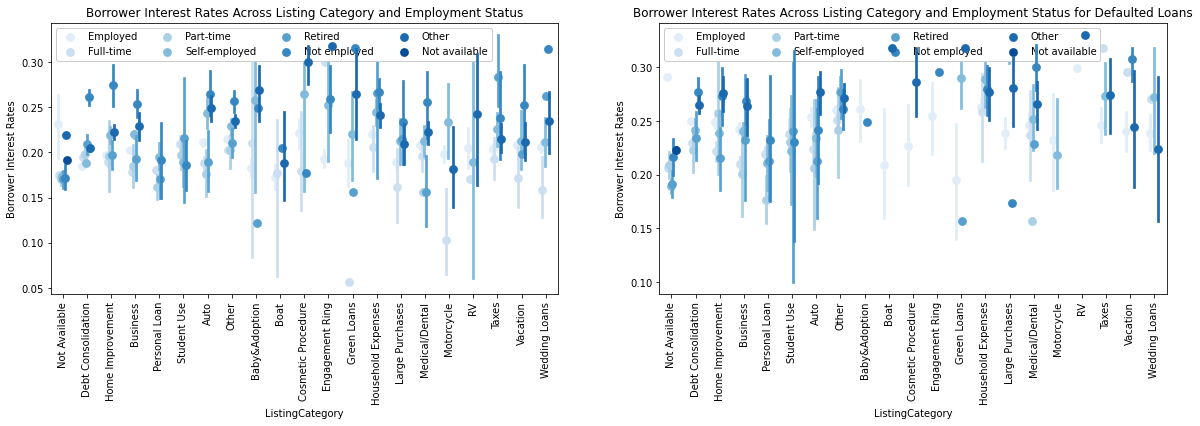

In [63]:
#Plot relationship betwen BorrowerRate against EmploymentStatus and ListingCategory for both dataframes
fig, ax = plt.subplots(ncols=2, figsize = [20,5])
sb.pointplot(data = df_clean, x = 'ListingCategory', y = 'BorrowerRate', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[0])
ax[0].set_title('Borrower Interest Rates Across Listing Category and Employment Status')
ax[0].set_ylabel('Borrower Interest Rates')
ax[0].legend(loc=2, ncol=4, framealpha=1);
ax[0].tick_params('x', labelrotation=90);
sb.pointplot(data = df_sub, x = 'ListingCategory', y = 'BorrowerRate', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[1])
ax[1].set_title('Borrower Interest Rates Across Listing Category and Employment Status for Defaulted Loans')
ax[1].set_ylabel('Borrower Interest Rates')
ax[1].legend(loc=2, ncol=4, framealpha=1);
ax[1].tick_params('x', labelrotation=90);

##### Take a look at loan amounts compared to employment status and the listing categor

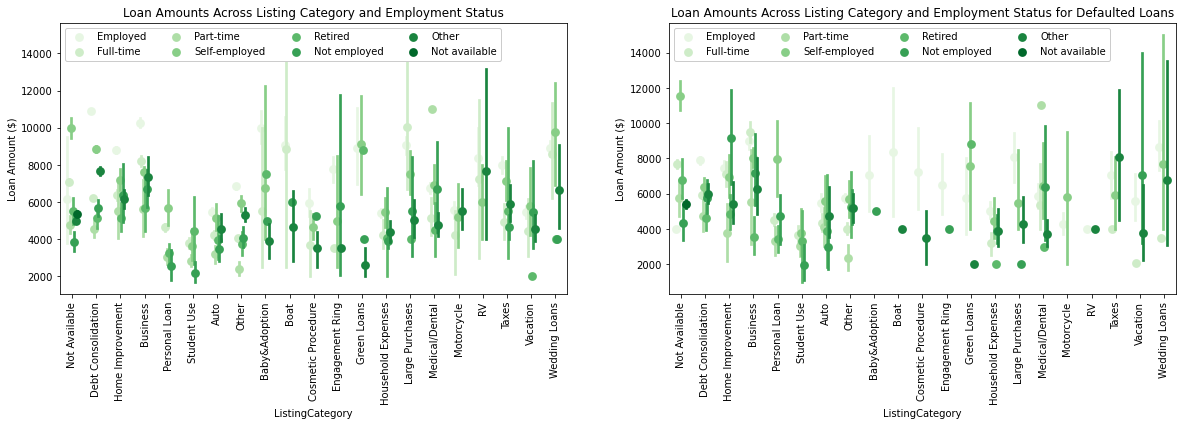

In [127]:
#Plot relationship of LoanOriginalAmount against EmploymentStatus and ListingCategory for both dataframes
fig, ax = plt.subplots(ncols=2, figsize = [20,5])
sb.pointplot(data = df_clean, x = 'ListingStatus', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[0])
ax[0].set_title('Loan Amounts Across Listing Category and Employment Status')
ax[0].set_ylabel('Loan Amount ($)')
ax[0].legend(loc=2, ncol=4, framealpha=1);
ax[0].tick_params('x', labelrotation=90);
sb.pointplot(data = df_sub, x = 'ListingCategory', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1])
ax[1].set_title('Loan Amounts Across Listing Category and Employment Status for Defaulted Loans')
ax[1].set_ylabel('Loan Amount ($)')
ax[1].legend(loc=2, ncol=4, framealpha=1);
ax[1].tick_params('x', labelrotation=90);

##### There is so much data it's difficult to find patterns in these point plots.

##### Look specifically on how the loan amount and interest rate affect the ultimate outcome of the loan.

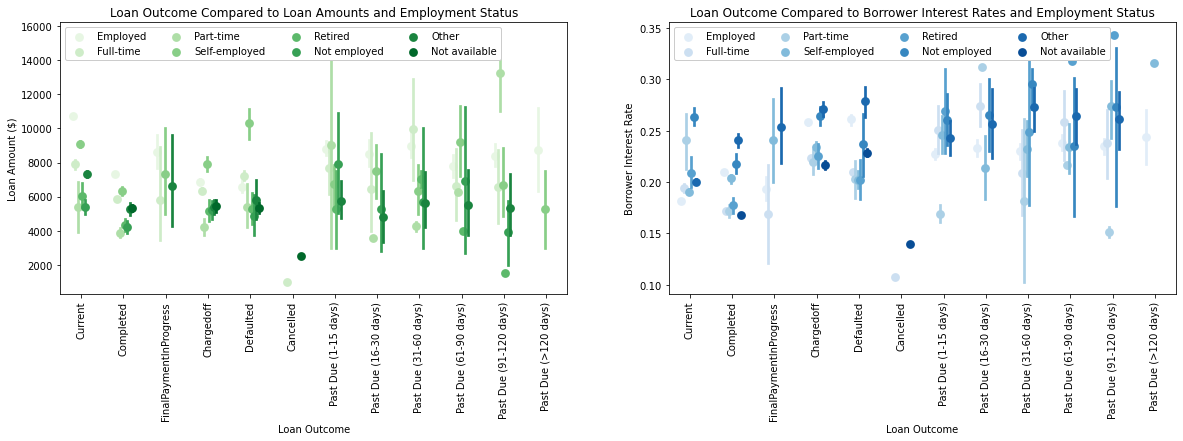

In [161]:
#Plot relationship of LoanStatus against LoanAmount and BorrowerRate
fig, ax = plt.subplots(ncols=2, figsize = [20,5])
sb.pointplot(data = df_clean, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[0])
ax[0].set_title('Loan Outcome Compared to Loan Amounts and Employment Status')
ax[0].set_ylabel('Loan Amount ($)')
ax[0].set_xlabel('Loan Outcome')
ax[0].legend(loc=2, ncol=4, framealpha=1);
ax[0].tick_params('x', labelrotation=90);
sb.pointplot(data = df_clean, x = 'LoanStatus', y = 'BorrowerRate', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[1])
ax[1].set_title('Loan Outcome Compared to Borrower Interest Rates and Employment Status')
ax[1].set_ylabel('Borrower Interest Rate')
ax[1].set_xlabel('Loan Outcome')
ax[1].legend(loc=2, ncol=4, framealpha=1);
ax[1].tick_params('x', labelrotation=90);

##### When you look at the data this way, the loans that are past due tend to have a larger difference in the loan amount and in the interest rate of the loan.  And cancelled loans tended to have lower loan amounts and lower interest rates.  Those are probably easier to cancel since would have less of a negative impact on the lender.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The factors that most seemed to affect a loan's outcome was the amount of money borrowed and the interest rate of the loan.  Higher interest, high value loans seems to be more likely to be past due.  Employed individuals had the highest spread in the data, which makes sense since I assume employed individuals are more likely to apply for and receive loans.  

> As the borrower's credit score increases, the interest rate decreases. There are a couple of instances where you can also see some affect of loan amount on the interest rate as well but it's not as dramatic.

### Were there any interesting or surprising interactions between features?

> It was surprising to see that individuals who were employed full-time had the highest rate of defaulting on a loan. I would have expected it to be unemployed individuals.

### Overall Insights

> The factors that most seemed to affect a loan's outcome was the amount of money borrowed and the interest rate of the loan.  Higher interest, high value loans seems to be more likely to be past due.  Employed individuals had the highest spread in the data.  When the means of loan amount and borrower interest rate were compared after subsetting the data for just loans that were in default or overdue:
> * Mean loan amount for whole dataframe:  \\$8337.01
> * Mean loan amount for dataframe with only defaulted or overdue loans:  \\$6623.51
> * Mean borrower interest rate for whole dataframe:  0.19
> * Mean borrower interest rate for dataframe with only defaulted or overdue loans:  0.23

> The factors that most affected the borrower's interest rate were narrowed down by the correlation heat matrix.  None of the features had a strong correlation but the highest was the credit score.  As the borrower's credit score increases, the interest rate decreases. There are a couple of instances where you can also see some affect of loan amount on the interest rate as well but it's not as dramatic.

> Debt consolidation and baby adoption seem to account for the highest loan amounts and the more money people made, the higher the loan appears to be.